In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


data = pd.read_csv('SAdata_allMeasures.csv') 
print(data.head()) 


   age  gender  yearDriving  drivingFrequency  temp_length  temp_decisiontime  \
0   26       1           20                 1           12            4.80219   
1   26       1           20                 1            6            4.91667   
2   26       1           20                 1            1            2.21716   
3   26       1           20                 1            3            2.63056   
4   26       1           20                 1            9            2.42632   

   temp_decision_made  temp_correct_decision  temp_danger  temp_difficulty  \
0                   4                      2           20               89   
1                   1                      2           10               99   
2                   2                      2           99               99   
3                   1                      2            9               79   
4                   1                      2            9               96   

   ...    fMax  backMirror  leftMirror  righ

In [8]:
print(data.isnull().sum())


age                      0
gender                   0
yearDriving              0
drivingFrequency         0
temp_length              0
temp_decisiontime        0
temp_decision_made       0
temp_correct_decision    0
temp_danger              0
temp_difficulty          0
CarPlacedLeft            0
CarPlacedRight           0
numS                     0
sAmpMean                 0
sAmpStd                  0
sAmpMax                  0
numF                     0
fMean                    0
fStd                     0
fMax                     0
backMirror               0
leftMirror               0
rightMirror              0
road                     0
sky                      0
pupilChange              0
pupilMean                0
pupilStd                 0
Y                        0
dtype: int64


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    1054 non-null   int64  
 1   gender                 1054 non-null   int64  
 2   yearDriving            1054 non-null   int64  
 3   drivingFrequency       1054 non-null   int64  
 4   temp_length            1054 non-null   int64  
 5   temp_decisiontime      1054 non-null   float64
 6   temp_decision_made     1054 non-null   int64  
 7   temp_correct_decision  1054 non-null   int64  
 8   temp_danger            1054 non-null   int64  
 9   temp_difficulty        1054 non-null   int64  
 10  CarPlacedLeft          1054 non-null   int64  
 11  CarPlacedRight         1054 non-null   int64  
 12  numS                   1054 non-null   int64  
 13  sAmpMean               1054 non-null   float64
 14  sAmpStd                1054 non-null   float64
 15  sAmp

In [10]:
X = data.drop(columns=['Y']) 
y = data['Y'] 

In [11]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

correlation = data.corr()['Y'].abs().sort_values(ascending=False)
print(correlation)
top_features = correlation[1:20].index.tolist()
X = data[top_features]
y = data['Y']

# 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# split off the test set (10%)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# split the remaining data into training (70%) and validation (20%)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.22222, random_state=42)


# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Print the shapes to verify the split
print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Test set shape:", X_test.shape)


Y                        1.000000
backMirror               0.293880
temp_length              0.266213
numS                     0.233883
numF                     0.233883
temp_decisiontime        0.231858
sAmpMax                  0.227739
sAmpStd                  0.226207
temp_difficulty          0.202998
pupilChange              0.199242
pupilStd                 0.186465
fMax                     0.171831
road                     0.163231
fStd                     0.157410
sAmpMean                 0.141686
temp_decision_made       0.139651
drivingFrequency         0.123181
temp_danger              0.109186
CarPlacedLeft            0.106326
sky                      0.099791
rightMirror              0.091308
pupilMean                0.074965
CarPlacedRight           0.061614
fMean                    0.056902
leftMirror               0.049807
yearDriving              0.042828
age                      0.035239
temp_correct_decision    0.024451
gender                   0.000936
Name: Y, dtype

<Figure size 1200x1000 with 0 Axes>

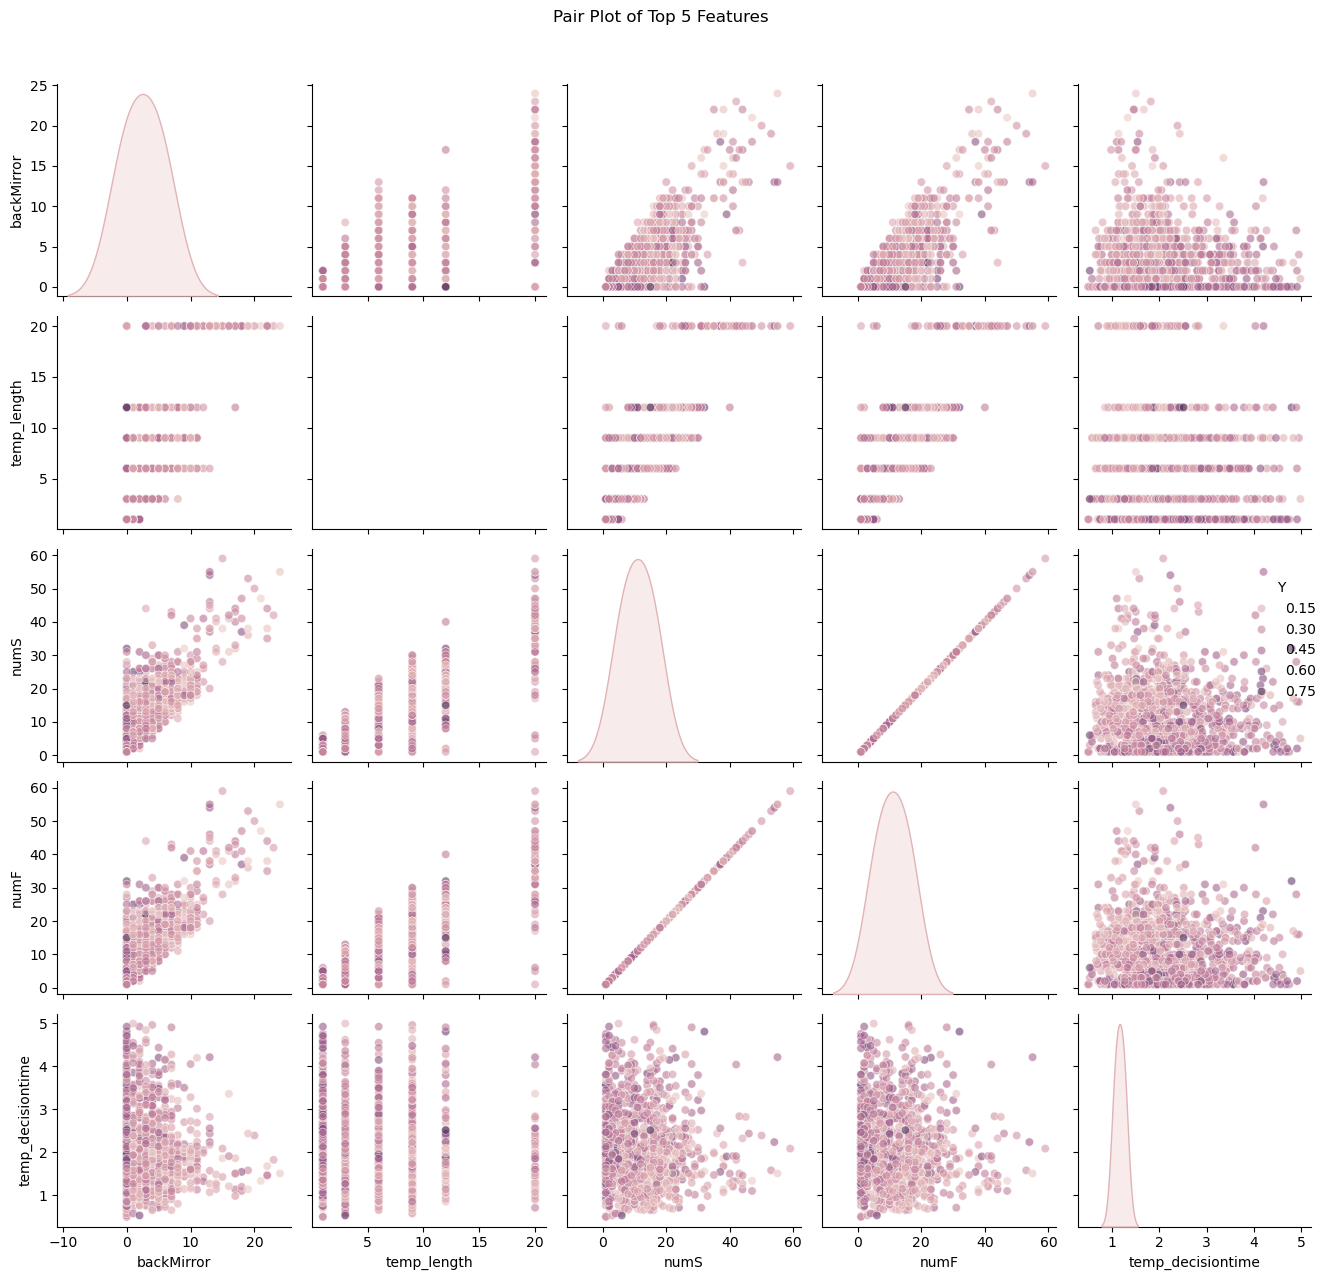

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


plot_features = [feature for feature in top_features[:6] if feature != 'Y'][:5]

plt.figure(figsize=(12, 10))
sns.pairplot(data[plot_features + ['Y']], 
             vars=plot_features,
             hue='Y',
             diag_kind='kde',
             plot_kws={'alpha': 0.6})

plt.suptitle('Pair Plot of Top 5 Features', y=1.02)
plt.tight_layout()
plt.show()



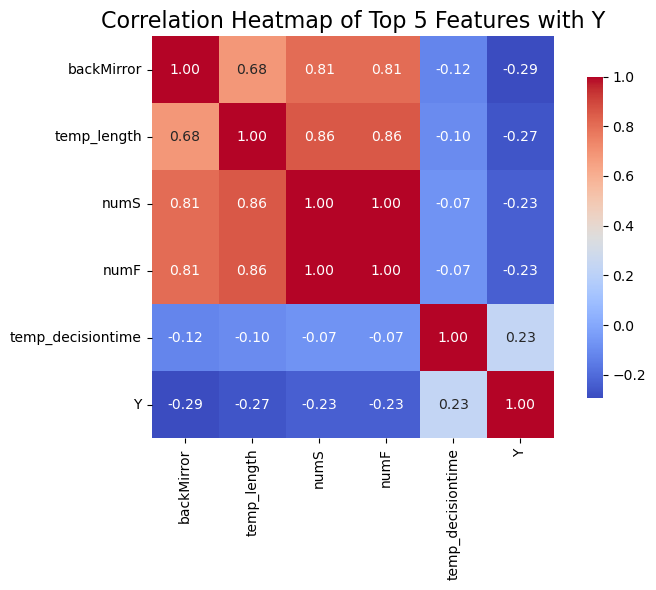

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = data.corr()

correlation_with_y = correlation_matrix['Y'].abs().sort_values(ascending=False)


top_features = correlation_with_y.index[1:6]  # Skip 'Y'

plt.figure(figsize=(8, 6))
sns.heatmap(data[top_features.tolist() + ['Y']].corr(), 
             annot=True, 
             cmap='coolwarm', 
             fmt='.2f', 
             square=True, 
             cbar_kws={"shrink": .8})

plt.title('Correlation Heatmap of Top 5 Features with Y', fontsize=16)
plt.tight_layout()
plt.show()


#### Non-tree method : Ridge Regression

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


/opt/anaconda3/envs/AIMA/lib/python3.10/site-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 100 is smaller than n_iter=200. Running 100 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


[CV] END .......................................alpha=0.0001; total time=   0.0s
[CV] END .......................................alpha=0.0001; total time=   0.0s
[CV] END .......................................alpha=0.0001; total time=   0.0s
[CV] END .......................................alpha=0.0001; total time=   0.0s
[CV] END .......................................alpha=0.0001; total time=   0.0s
[CV] END .......................................alpha=0.0001; total time=   0.0s
[CV] END .......................alpha=0.00012045035402587823; total time=   0.0s
[CV] END .......................alpha=0.00012045035402587823; total time=   0.0s
[CV] END .......................alpha=0.00012045035402587823; total time=   0.0s
[CV] END .......................alpha=0.00012045035402587823; total time=   0.0s
[CV] END .......................alpha=0.00012045035402587823; total time=   0.0s
[CV] END .......................alpha=0.00012045035402587823; total time=   0.0s
[CV] END ...................

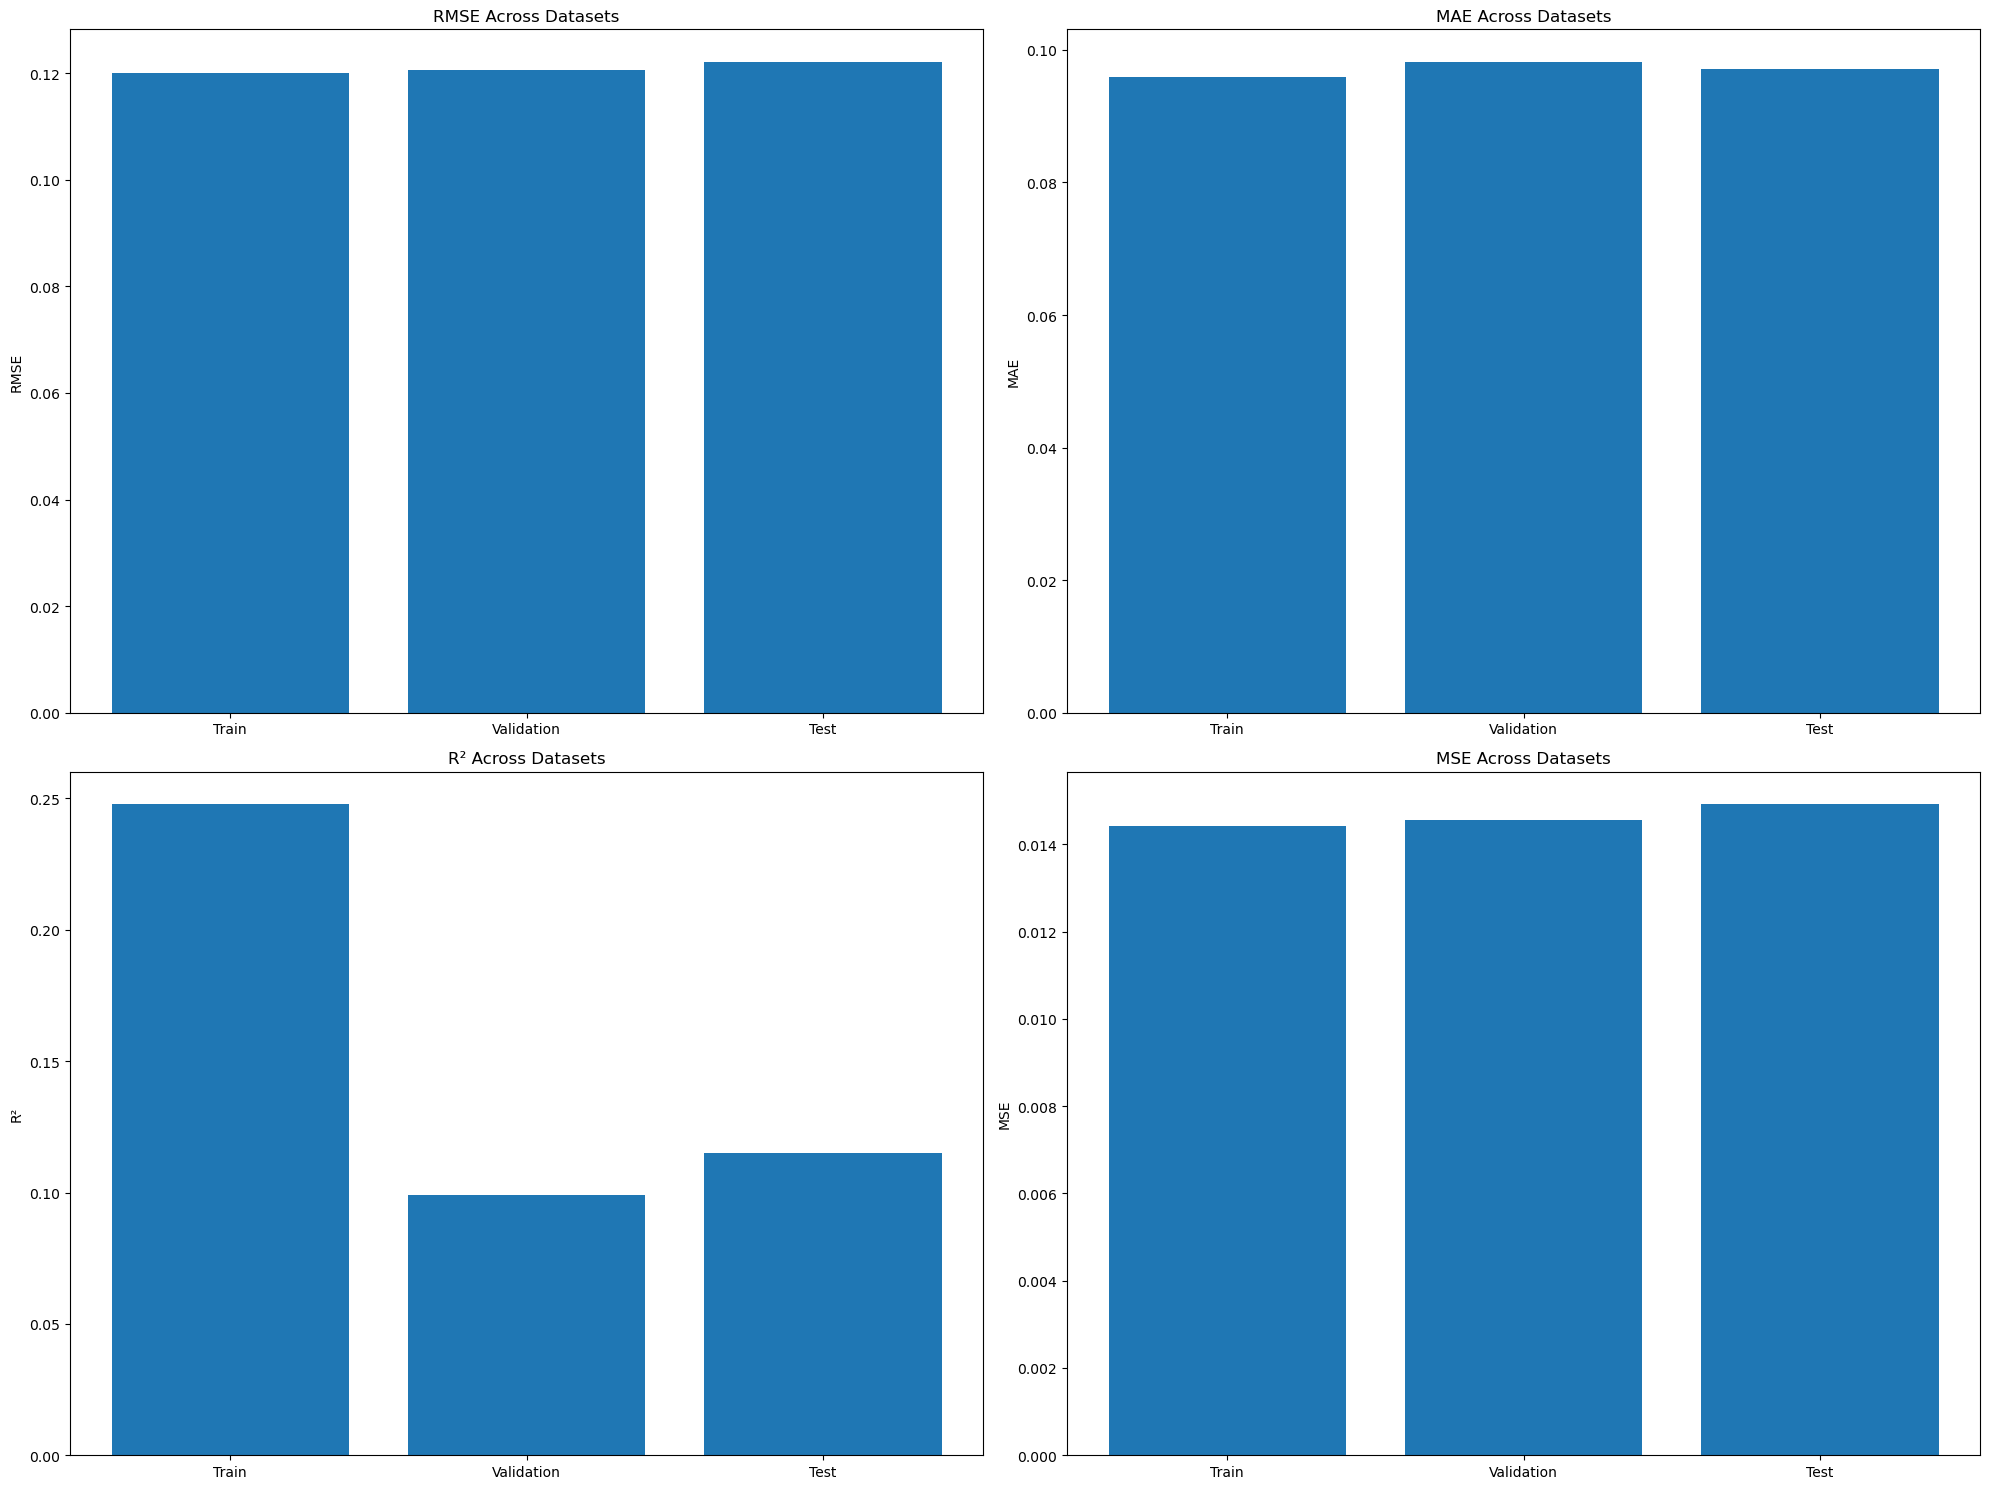


Best Hyperparameters:
{'alpha': 65.79332246575683}

Overall Training Time: 6.67 seconds
Prediction Time: 0.01 seconds

Metrics for Train, Validation, and Test:
Train Metrics: {'MSE': 0.01442197889199419, 'RMSE': 0.12009154379886283, 'MAE': 0.09583328825225927, 'R²': 0.24771498382041957}
Validation Metrics: {'MSE': 0.014549819742326536, 'RMSE': 0.12062263362373803, 'MAE': 0.0981824392526801, 'R²': 0.09909173182414988}
Test Metrics: {'MSE': 0.014914750218672604, 'RMSE': 0.12212596046161768, 'MAE': 0.09711030133582828, 'R²': 0.1149115643302775}


In [14]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
import time

def ridge_regression_training(X_train, X_val, X_test, y_train, y_val, y_test):
    np.random.seed(42)

   
    param_grid = {
        'alpha': np.logspace(-4, 4, 100)  
    }


    kfold = KFold(n_splits=10, shuffle=True, random_state=42)

    ridge_reg = Ridge(random_state=42)

    # RandomizedSearchCV for hyperparameter tuning
    random_search = RandomizedSearchCV(
        estimator=ridge_reg,
        param_distributions=param_grid,
        n_iter=200,  
        cv=kfold,
        scoring='neg_mean_squared_error',
        verbose=2,
        n_jobs=-1,
        random_state=42
    )

    start_training_time = time.time()

    # Fitting RandomizedSearchCV
    random_search.fit(X_train, y_train)

    # Calculate total training time
    training_time = time.time() - start_training_time

    # Best model from RandomizedSearchCV
    best_model = random_search.best_estimator_

    # Predictions
    start_pred_time = time.time()
    y_train_pred = best_model.predict(X_train)
    y_val_pred = best_model.predict(X_val)
    y_test_pred = best_model.predict(X_test)
    prediction_time = time.time() - start_pred_time

    # Metrics calculation
    def calculate_metrics(y_true, y_pred):
        mse = mean_squared_error(y_true, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_true, y_pred)
        r2 = r2_score(y_true, y_pred)
        return {'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'R²': r2}

    train_metrics = calculate_metrics(y_train, y_train_pred)
    val_metrics = calculate_metrics(y_val, y_val_pred)
    test_metrics = calculate_metrics(y_test, y_test_pred)

    # Visualization: RMSE, MAE, R², MSE
    plt.figure(figsize=(20, 15))

    # RMSE Plot
    plt.subplot(2, 2, 1)
    plt.bar(['Train', 'Validation', 'Test'], [train_metrics['RMSE'], val_metrics['RMSE'], test_metrics['RMSE']])
    plt.title('RMSE Across Datasets')
    plt.ylabel('RMSE')

    # MAE Plot
    plt.subplot(2, 2, 2)
    plt.bar(['Train', 'Validation', 'Test'], [train_metrics['MAE'], val_metrics['MAE'], test_metrics['MAE']])
    plt.title('MAE Across Datasets')
    plt.ylabel('MAE')

    # R² Plot
    plt.subplot(2, 2, 3)
    plt.bar(['Train', 'Validation', 'Test'], [train_metrics['R²'], val_metrics['R²'], test_metrics['R²']])
    plt.title('R² Across Datasets')
    plt.ylabel('R²')

    # MSE Plot
    plt.subplot(2, 2, 4)
    plt.bar(['Train', 'Validation', 'Test'], [train_metrics['MSE'], val_metrics['MSE'], test_metrics['MSE']])
    plt.title('MSE Across Datasets')
    plt.ylabel('MSE')

    plt.tight_layout()
    plt.show()

    # Print Results
    print("\nBest Hyperparameters:")
    print(random_search.best_params_)

    print(f"\nOverall Training Time: {training_time:.2f} seconds")
    print(f"Prediction Time: {prediction_time:.2f} seconds")

    print("\nMetrics for Train, Validation, and Test:")
    print(f"Train Metrics: {train_metrics}")
    print(f"Validation Metrics: {val_metrics}")
    print(f"Test Metrics: {test_metrics}")

    return best_model

# Usage
best_model = ridge_regression_training(X_train, X_val, X_test, y_train, y_val, y_test)


### For the shap evlauation we got inspired by this code: https://www.kaggle.com/code/iamleonie/understanding-shapley-values

In [15]:
import shap

# Ensure model and X_train_scaled are defined
explainer = shap.LinearExplainer(best_model, X_train)
shap_values = explainer.shap_values(X_test)
shap_values

array([[ 0.01303835, -0.00730436,  0.00131945, ...,  0.00157685,
        -0.0048224 ,  0.00228858],
       [ 0.02874721,  0.01499902, -0.00637243, ..., -0.0013151 ,
         0.00463329,  0.00228858],
       [-0.12048695, -0.0379715 ,  0.01492818, ..., -0.00229542,
        -0.0048224 , -0.00444254],
       ...,
       [ 0.02089278,  0.00105941,  0.00191114, ..., -0.00067789,
        -0.0048224 , -0.00444254],
       [ 0.02874721,  0.01499902, -0.00696412, ...,  0.00255717,
        -0.0048224 ,  0.00228858],
       [-0.03408822, -0.00730436,  0.00072777, ..., -0.00229542,
         0.00463329,  0.00228858]])

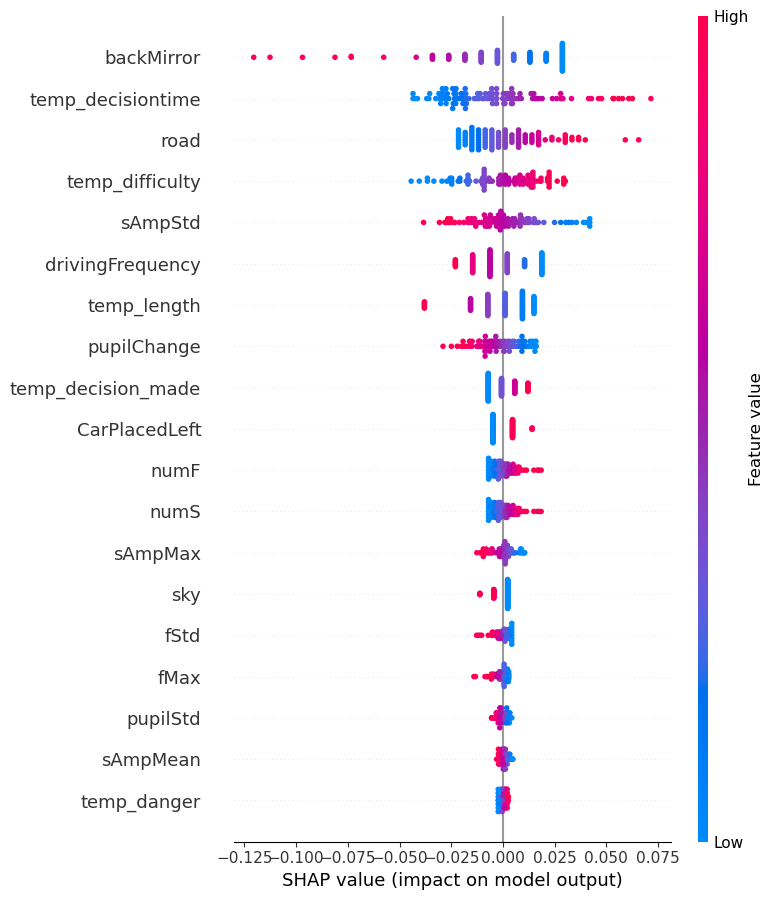

In [16]:
import pandas as pd


feature_names = X.columns
X_test_scaled_df = pd.DataFrame(X_test, columns=feature_names)
shap.summary_plot(shap_values, X_test_scaled_df, max_display=29)


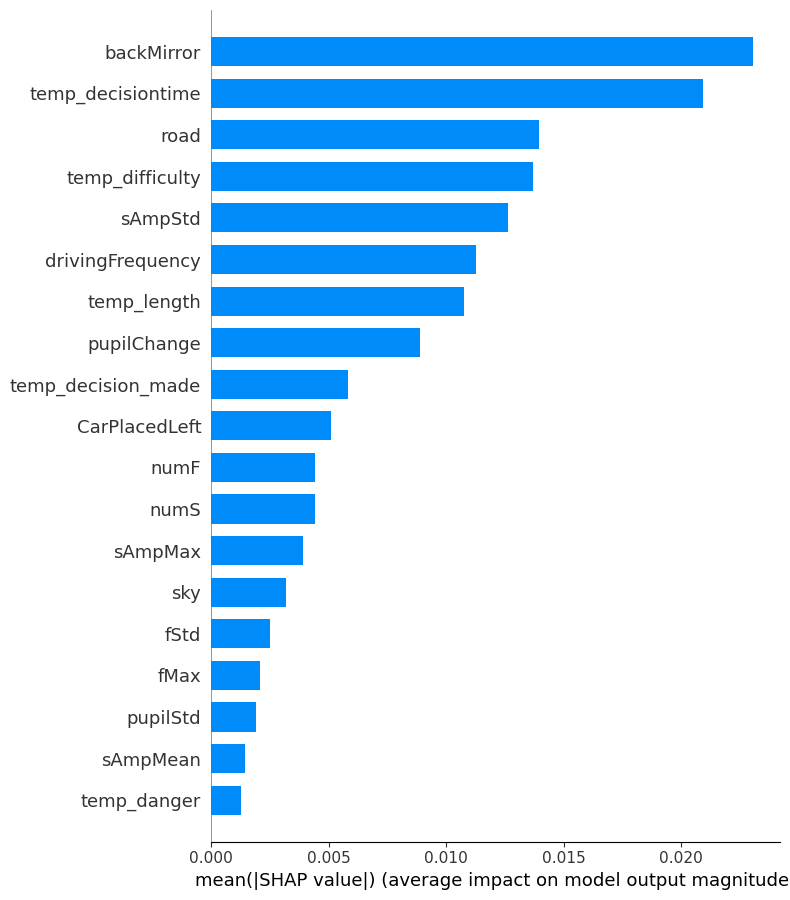

In [17]:
shap.summary_plot(shap_values, X_test_scaled_df, plot_type='bar', max_display=29)

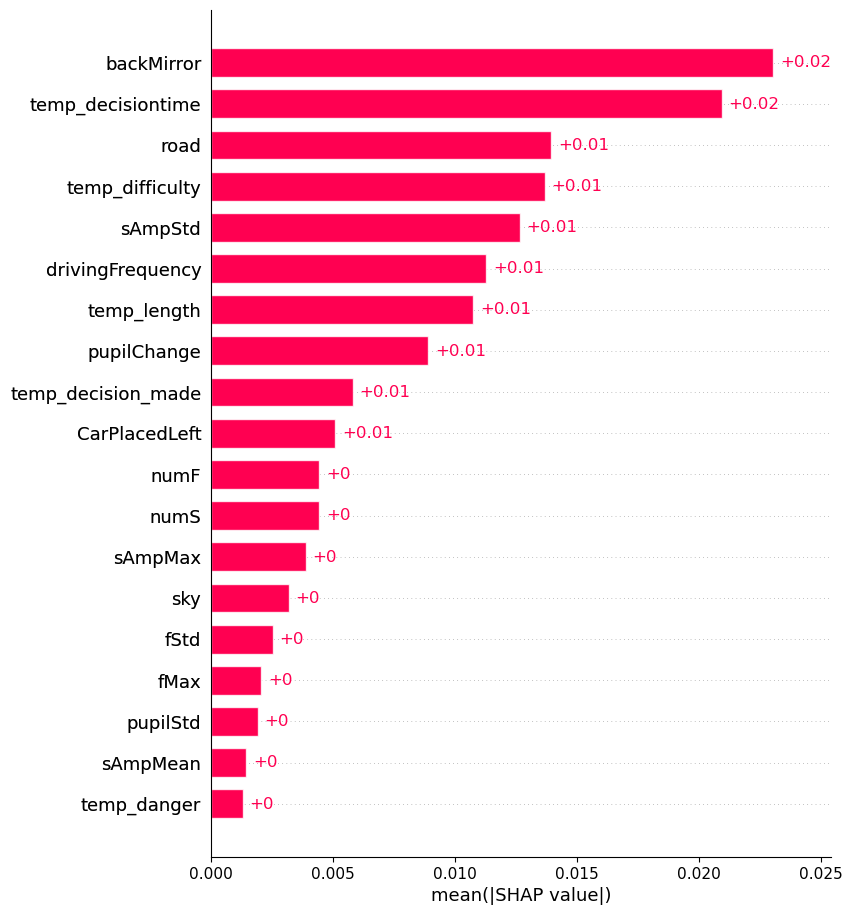

In [18]:
shap_values = explainer(X_test_scaled_df)
shap.plots.bar(shap_values, max_display=29)

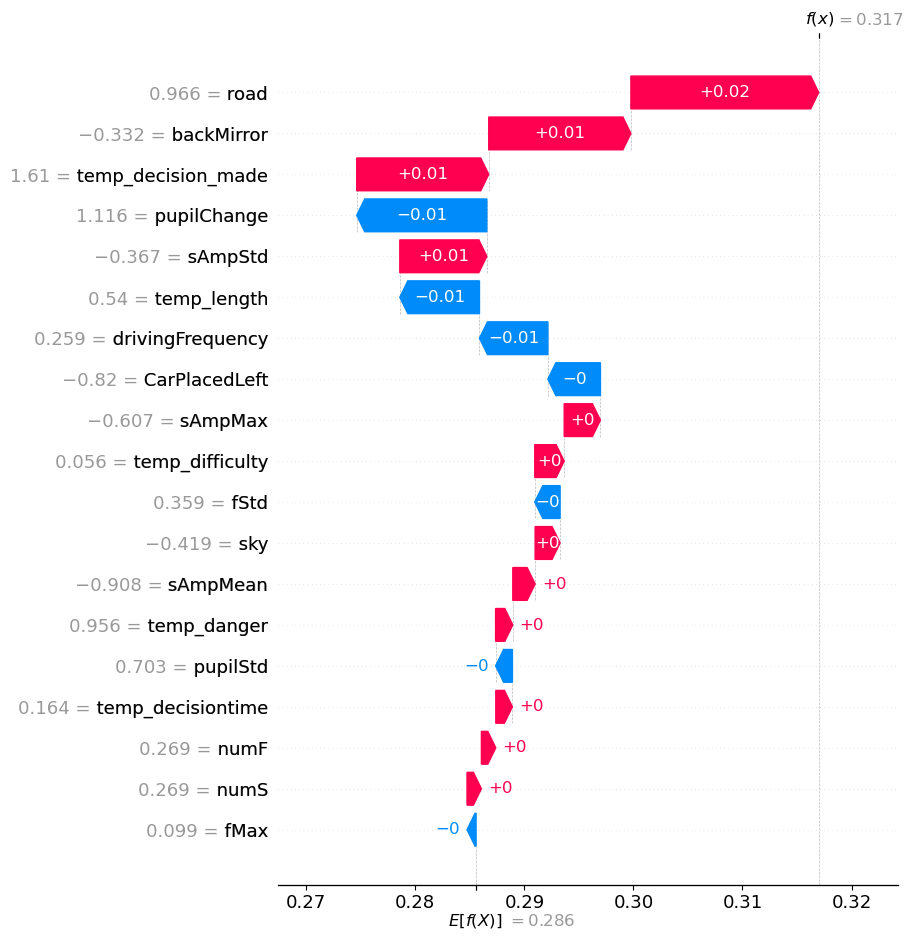

In [19]:
instance_index = 0 
shap.waterfall_plot(shap_values[instance_index], max_display=20) 
plt.show()


### LightGBM 


/opt/anaconda3/envs/AIMA/lib/python3.10/site-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 54 is smaller than n_iter=200. Running 54 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 10 folds for each of 54 candidates, totalling 540 fits
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightG

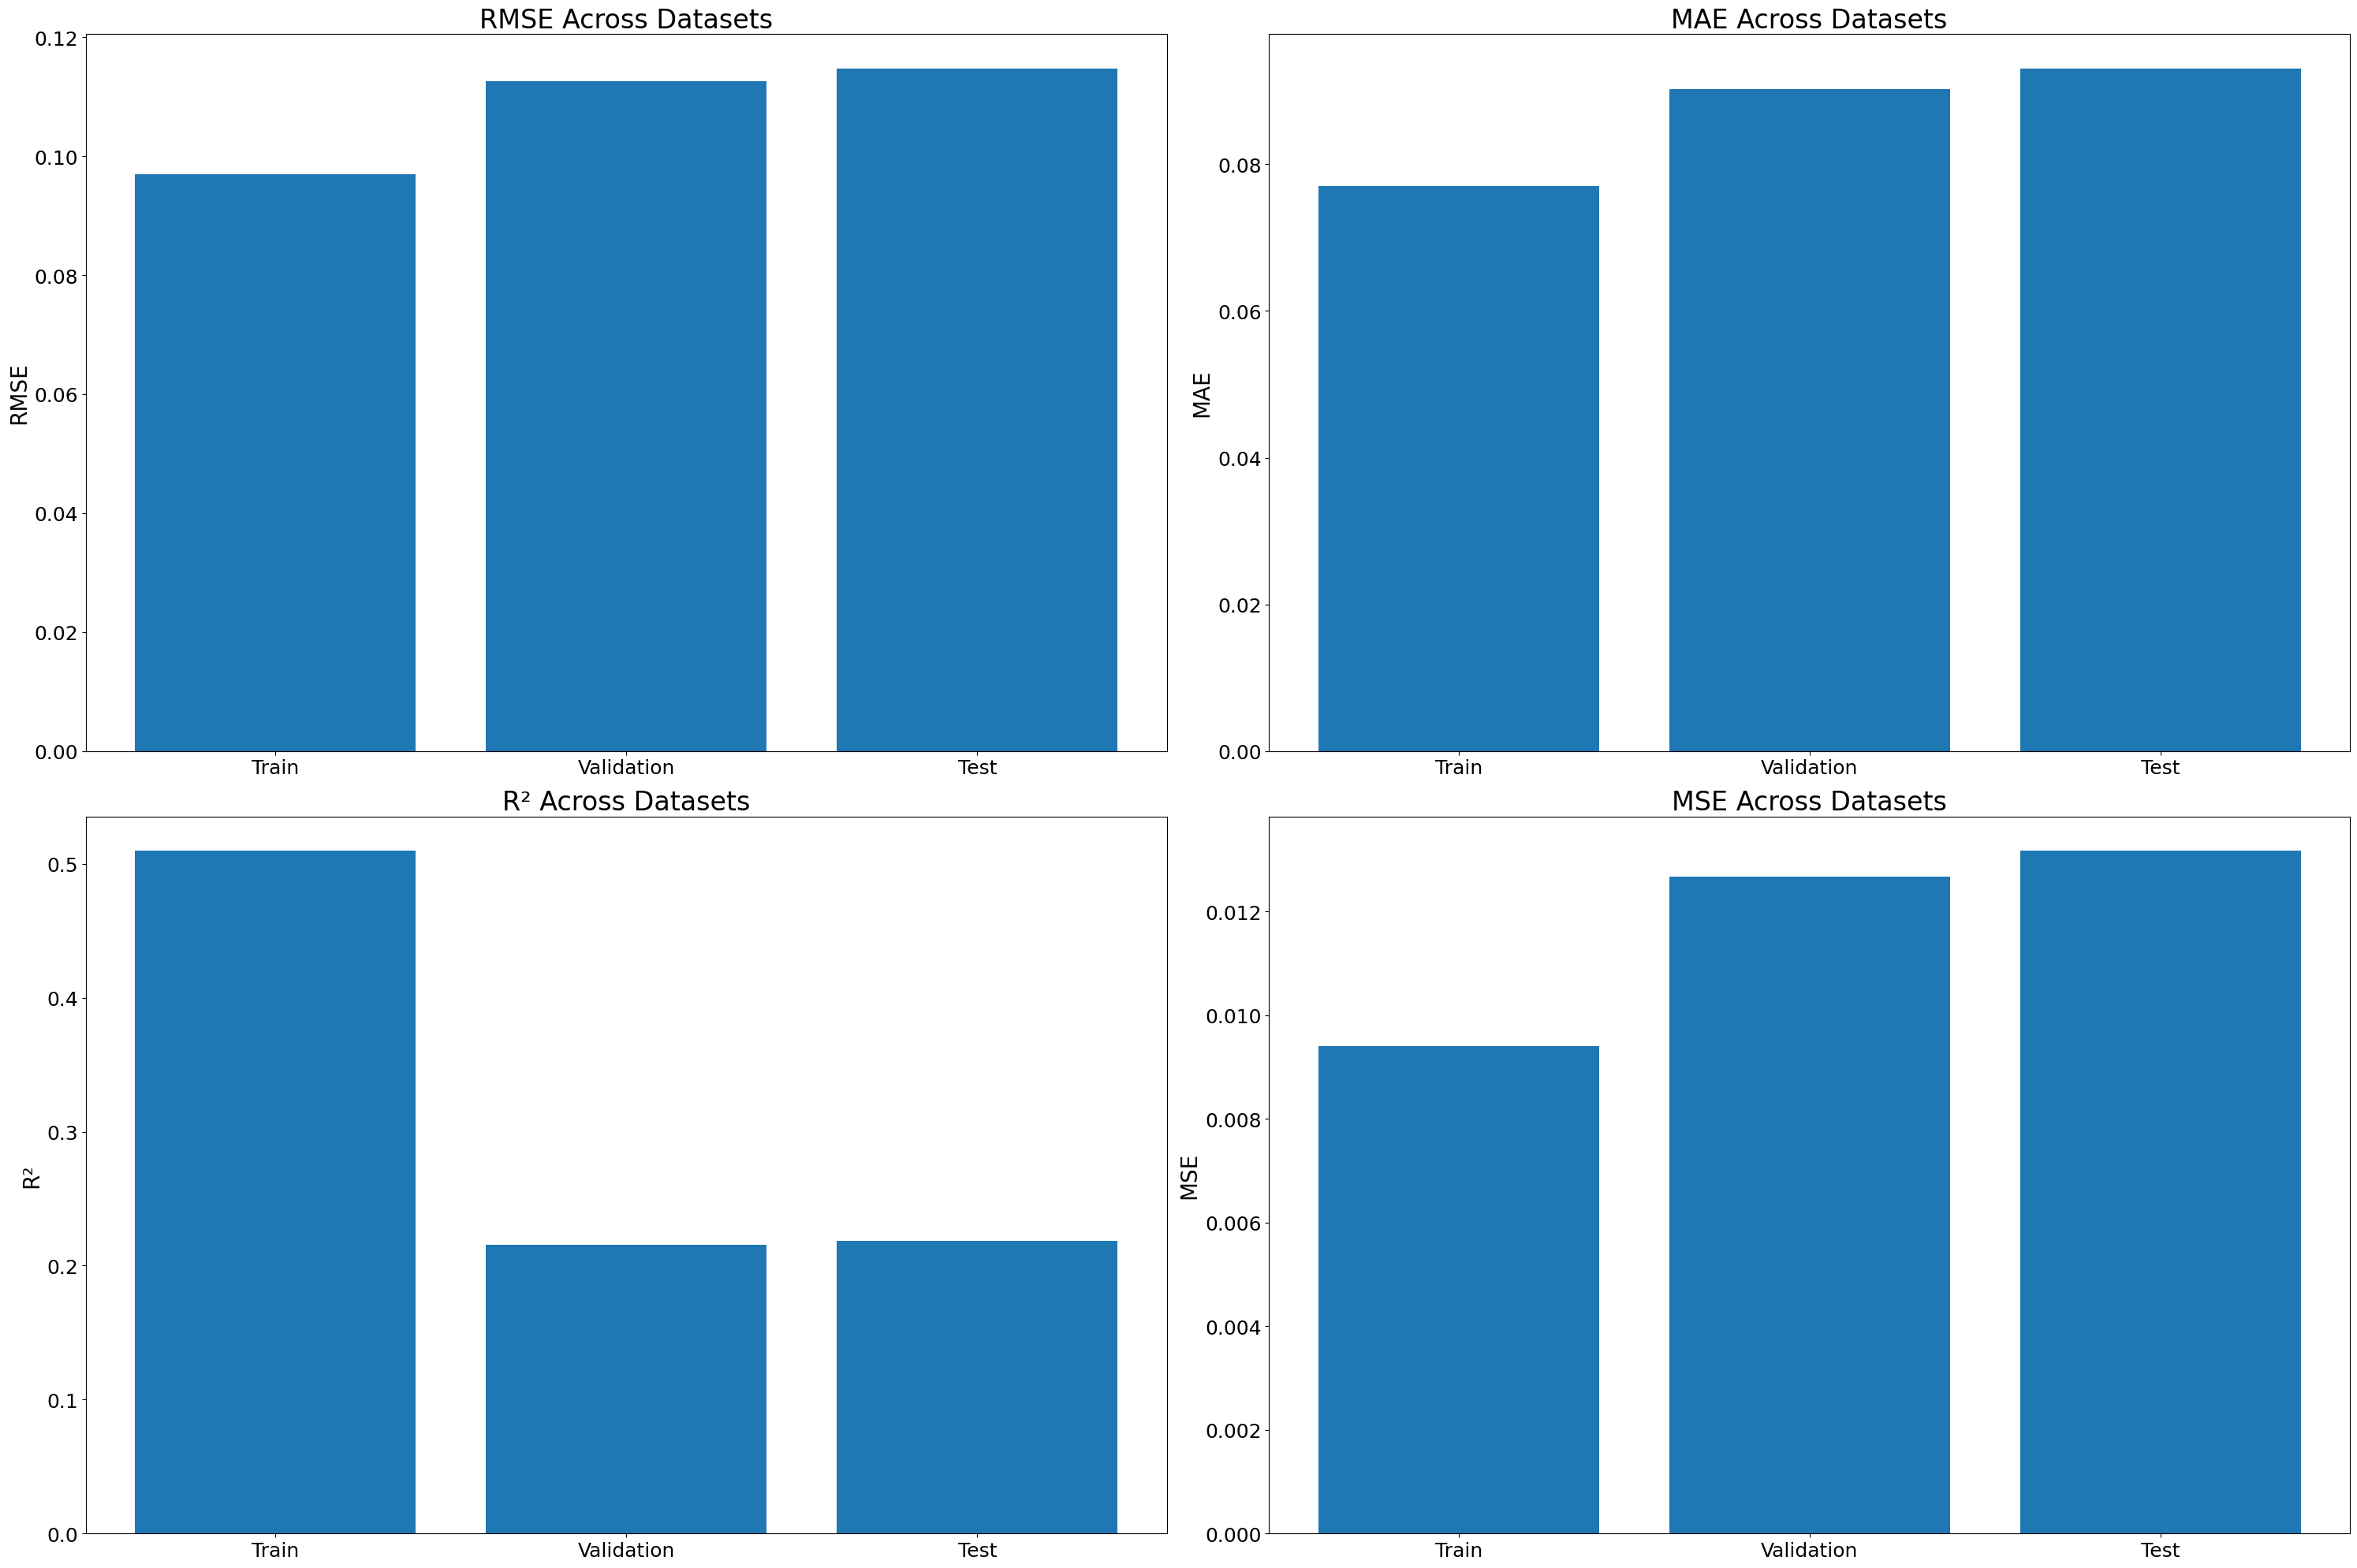

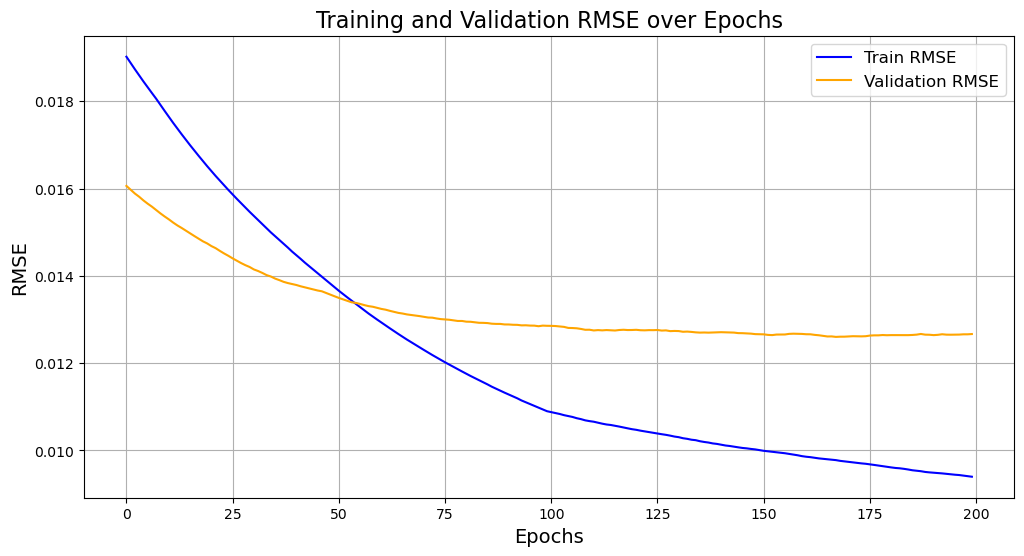

[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.

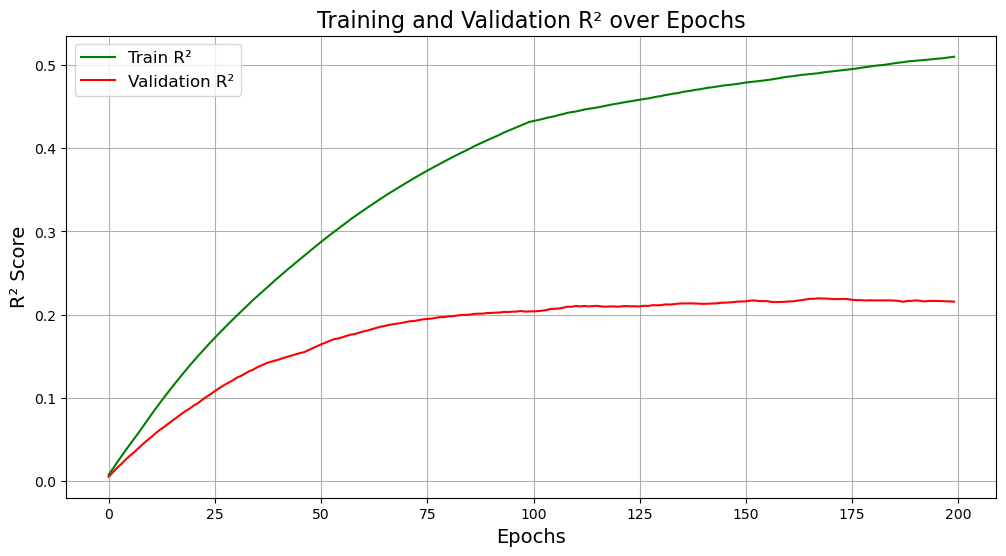


Best Hyperparameters:
{'num_leaves': 31, 'n_estimators': 200, 'learning_rate': 0.01, 'boosting_type': 'goss'}

Overall Training Time: 338.99 seconds
Prediction Time: 0.01 seconds

Metrics for Train, Validation, and Test:
Train Metrics: {'MSE': 0.009397682973995222, 'RMSE': 0.0969416472626457, 'MAE': 0.07700977069166703, 'R²': 0.509794311787056}
Validation Metrics: {'MSE': 0.012667228651589386, 'RMSE': 0.1125487834300726, 'MAE': 0.09020099499492641, 'R²': 0.21565962814697348}
Test Metrics: {'MSE': 0.013170766091100437, 'RMSE': 0.11476395815368358, 'MAE': 0.0930725573178614, 'R²': 0.21840509661707252}


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import lightgbm as lgb
import time

def lightgbm_training(X_train, X_val, X_test, y_train, y_val, y_test):
    np.random.seed(42)
    
    param_grid = {
    'boosting_type': ['goss'], 
    'n_estimators': [50, 100, 200],
    'num_leaves': [31, 50, 75,100, 200, 300],
    'learning_rate': [0.05, 0.01, 0.001],
    #'feature_fraction': [0.9, 0.8],
    #'bagging_freq': [5, 7, 8],
}


    

    kfold = KFold(n_splits=10, shuffle=True, random_state=42)

    lgb_reg = lgb.LGBMRegressor(
        objective='regression',
        metrics= ['l2', 'l1'],
        random_state=42,
        n_jobs=-1
    )

    random_search = RandomizedSearchCV(
        estimator=lgb_reg,
        param_distributions=param_grid,
        n_iter=200, 
        cv=kfold,
        scoring='neg_mean_squared_error',
        verbose=2,
        n_jobs=-1,
        random_state=42
    )

    start_training_time = time.time()

    # Fitting RandomizedSearchCV
    random_search.fit(
        X_train, y_train,
        eval_set=[(X_train, y_train), (X_val, y_val)]  # Validation set
    )

    # Calculate total training time
    training_time = time.time() - start_training_time

    best_model = random_search.best_estimator_

    # Start timing for predictions
    start_pred_time = time.time()

    # Predictions
    y_train_pred = best_model.predict(X_train)
    y_val_pred = best_model.predict(X_val)
    y_test_pred = best_model.predict(X_test)
    
    # Calculate prediction time
    prediction_time = time.time() - start_pred_time
    # Extract evaluation results
    eval_results = random_search.best_estimator_.evals_result_
    
    # Extract metrics for training and validation sets
    epochs = len(eval_results['training']['l2'])  # LightGBM uses 'l2' for RMSE
    x_axis = range(0, epochs)
    
    # Metrics Calculation
    def calculate_metrics(y_true, y_pred):
        mse = mean_squared_error(y_true, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_true, y_pred)
        r2 = r2_score(y_true, y_pred)
        return {'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'R²': r2}

    # Calculate performance metrics
    train_metrics = calculate_metrics(y_train, y_train_pred)
    val_metrics = calculate_metrics(y_val, y_val_pred)
    test_metrics = calculate_metrics(y_test, y_test_pred)

    # Visualization: RMSE, MSE, MAE, R²
    plt.figure(figsize=(30, 20))

    # RMSE Plot
    plt.subplot(2, 2, 1)
    plt.bar(['Train', 'Validation', 'Test'], 
            [train_metrics['RMSE'], val_metrics['RMSE'], test_metrics['RMSE']])
    plt.title('RMSE Across Datasets', fontsize=24)
    plt.ylabel('RMSE', fontsize=20)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)

    # MAE Plot
    plt.subplot(2, 2, 2)
    plt.bar(['Train', 'Validation', 'Test'], 
            [train_metrics['MAE'], val_metrics['MAE'], test_metrics['MAE']])
    plt.title('MAE Across Datasets', fontsize=24)
    plt.ylabel('MAE', fontsize=20)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)

    # R² Plot
    plt.subplot(2, 2, 3)
    plt.bar(['Train', 'Validation', 'Test'], 
            [train_metrics['R²'], val_metrics['R²'], test_metrics['R²']])
    plt.title('R² Across Datasets', fontsize=24)
    plt.ylabel('R²', fontsize=20)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)

    # MSE Plot
    plt.subplot(2, 2, 4)
    plt.bar(['Train', 'Validation', 'Test'], 
            [train_metrics['MSE'], val_metrics['MSE'], test_metrics['MSE']])
    plt.title('MSE Across Datasets', fontsize=24)
    plt.ylabel('MSE', fontsize=20)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)

    plt.tight_layout()
    plt.show()

    train_rmse = eval_results['training']['l2']
    val_rmse = eval_results['valid_1']['l2']
    


# Plot RMSE over epochs
    epochs = range(len(train_rmse))
    plt.figure(figsize=(12, 6))
    plt.plot(epochs, train_rmse, label='Train RMSE', color='blue')
    plt.plot(epochs, val_rmse, label='Validation RMSE', color='orange')
    plt.title('Training and Validation RMSE over Epochs', fontsize=16)
    plt.xlabel('Epochs', fontsize=14)
    plt.ylabel('RMSE', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid()
    plt.show()


    train_r2 = []
    val_r2 = []


    for epoch in range(1, len(eval_results['training']['l2']) + 1):  # Epochs start from 1
      train_pred = best_model.predict(X_train, num_iteration=epoch)
      val_pred = best_model.predict(X_val, num_iteration=epoch)
      train_r2.append(r2_score(y_train, train_pred))
      val_r2.append(r2_score(y_val, val_pred))

    plt.figure(figsize=(12, 6))
    plt.plot(epochs, train_r2, label='Train R²', color='green')
    plt.plot(epochs, val_r2, label='Validation R²', color='red')
    plt.title('Training and Validation R² over Epochs', fontsize=16)
    plt.xlabel('Epochs', fontsize=14)
    plt.ylabel('R² Score', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid()
    plt.show()

    # Print Results
    print("\nBest Hyperparameters:")
    print(random_search.best_params_)
    
    # Print Timing Information
    print(f"\nOverall Training Time: {training_time:.2f} seconds")
    print(f"Prediction Time: {prediction_time:.2f} seconds")


    print("\nMetrics for Train, Validation, and Test:")
    print(f"Train Metrics: {train_metrics}")
    print(f"Validation Metrics: {val_metrics}")
    print(f"Test Metrics: {test_metrics}")

    return best_model


best_model = lightgbm_training(X_train, X_val, X_test, y_train, y_val, y_test)


In [21]:
import shap


explainer = shap.TreeExplainer(best_model, X_train)
shap_values = explainer.shap_values(X_test)
shap_values

array([[-0.00026533, -0.01340369, -0.00176562, ...,  0.00016696,
        -0.00107176,  0.00068067],
       [ 0.03615184,  0.0412518 , -0.00201644, ..., -0.00382515,
         0.00160649,  0.00022313],
       [-0.02443093, -0.01236844,  0.01081735, ..., -0.00054086,
        -0.00051442, -0.00056398],
       ...,
       [-0.00215758, -0.00385412, -0.00164947, ..., -0.00289229,
        -0.00187219, -0.00096476],
       [ 0.02662114,  0.037919  , -0.00259489, ..., -0.00178555,
        -0.00062845,  0.00024761],
       [-0.02336795, -0.0156995 , -0.00232827, ..., -0.00042758,
         0.0013307 ,  0.00019994]])

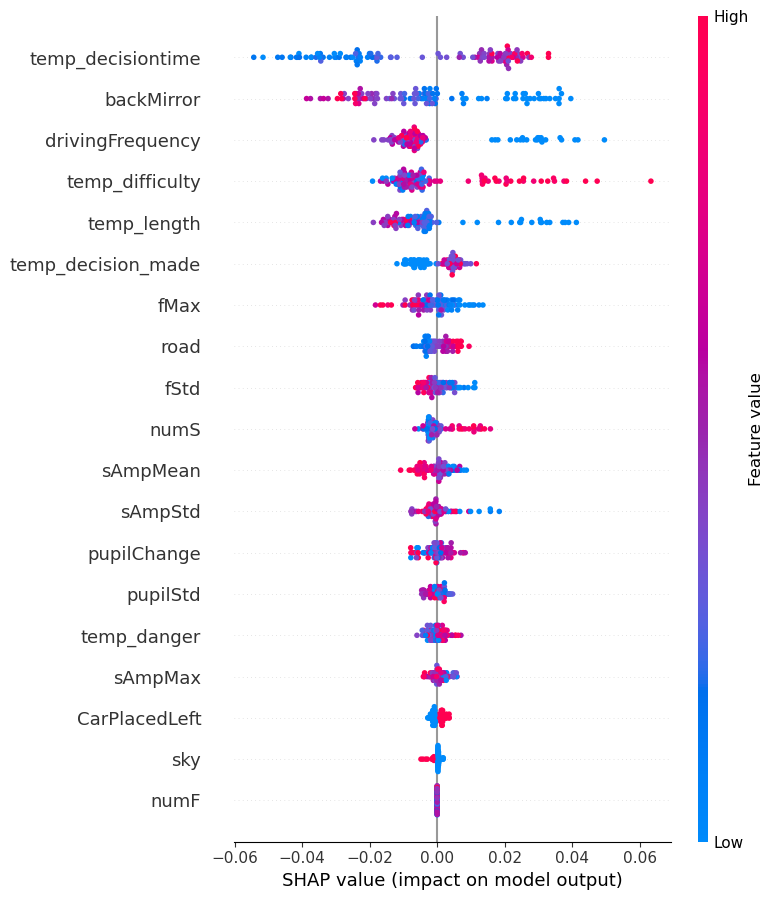

In [22]:
import pandas as pd


feature_names = X.columns
X_test_scaled_df = pd.DataFrame(X_test, columns=feature_names)
shap.summary_plot(shap_values, X_test_scaled_df, max_display=29)


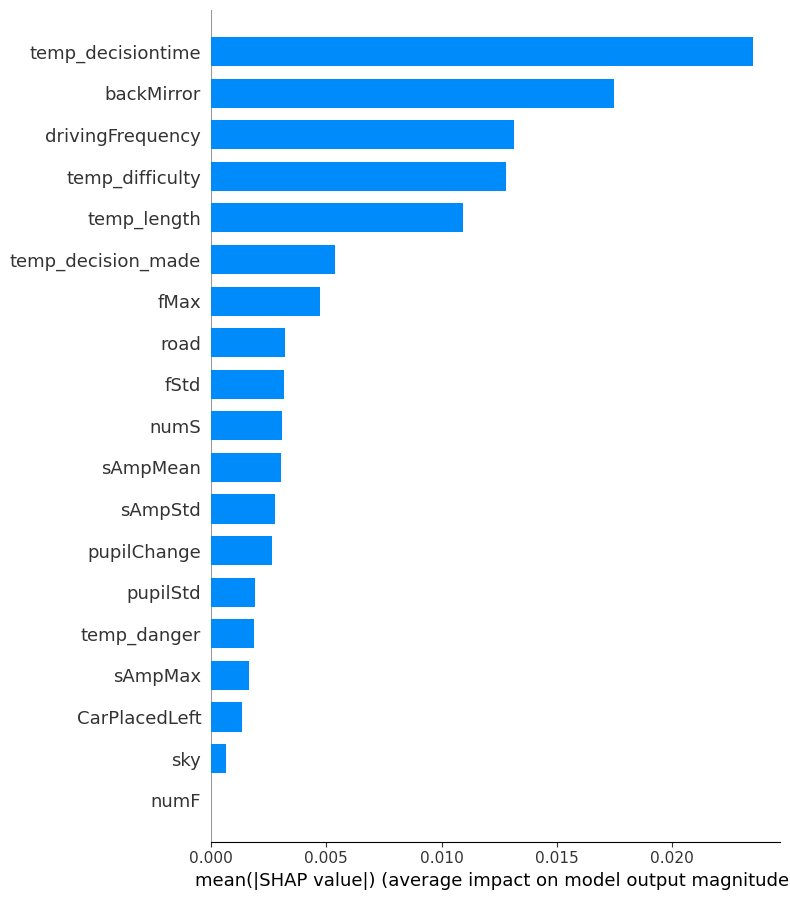

In [23]:
shap.summary_plot(shap_values, X_test_scaled_df, plot_type='bar', max_display=29)

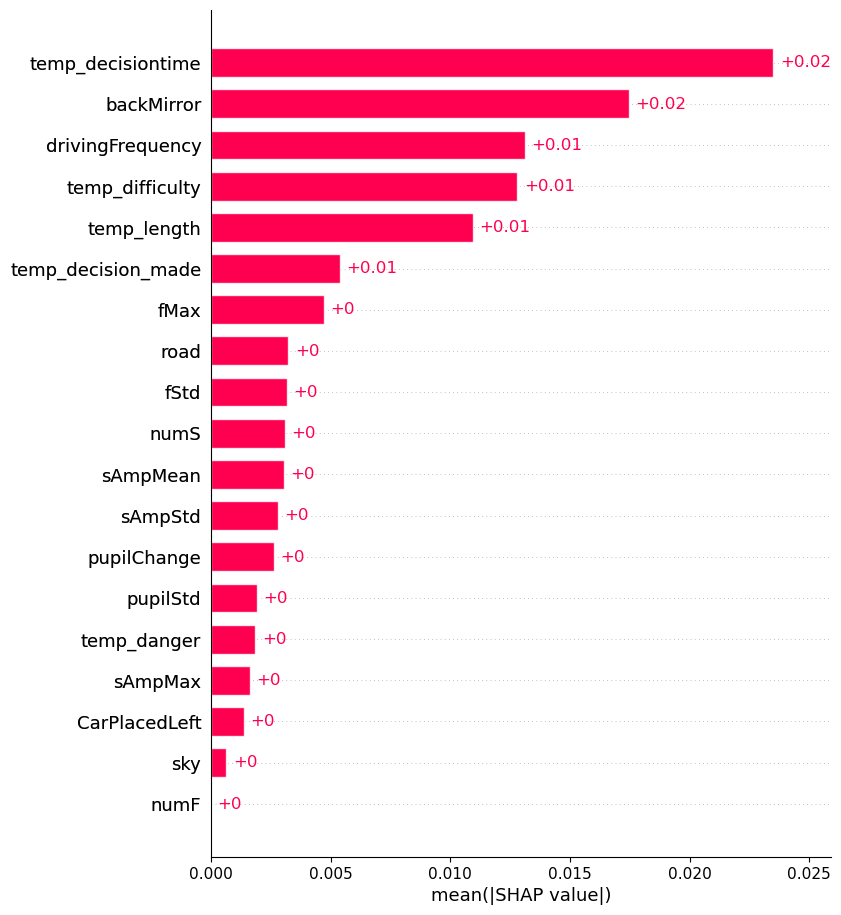

In [24]:
shap_values = explainer(X_test_scaled_df)
shap.plots.bar(shap_values, max_display=29)

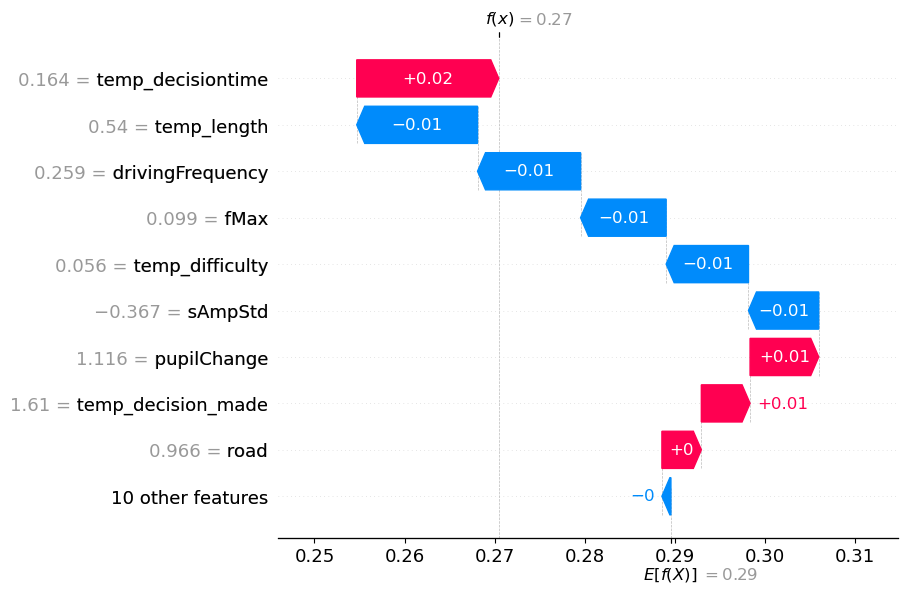

In [25]:
instance_index = 0
shap.waterfall_plot(shap_values[instance_index], max_display=10) 
plt.show()